# Bank Deposit Prediction


Hackathon link: https://skillenza.com/challenge/imarticus-datascience-hackathon-july2020



## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Importing Packages](#section2)<br>
3. [Loading Data](#section3)<br>
  - 3.1 [Description of the Datasets](#section301)<br>
  - 3.2 [Pandas Profiling before Data Preprocessing](#section302)<br>
4. [Data Preprocessing](#section4)<br>
  - 4.1 [Dropping columns which may not help in model prediction](#section401)<br>
  - 4.2 [Handling mismatched datatypes](#section402)<br>
  - 4.3 [Filling missing values](#section403)<br>
  - 4.4 [Removing outliers](#section404)<br>
  - 4.5 [Extracting features from date_of_establishment](#section405)<br>
  - 4.6 [Pandas Profiling after Data Preprocessing](#section406)<br>
5. [Exploratory Data Analysis](#section5)<br>
  - 5.1 [Multivariate Analysis](#section501)<br>
6. [Data preparation for model building](#section6)<br>  
  - 6.1 [Converting categorical variables to numerical](#section601)<br>
  - 6.2 [Standardization of continuous independant variables](#section602)
7. [Ensemble Modelling and Prediction](#section7)<br>  
  - 7.1 [Linear Regression](#section701)
  - 7.2 [Random Forest](#section702)
  - 7.3 [GradientBoostingRegressor](#section703)
8. [Conclusion](#section8)<br>  

<a id=section1></a>
# 1. Problem Statement

The objective of the problem is to predict the amount that would be deposited in each branch in the year 2017. 


<a id=section2></a>
# 2. Importing Packages

In [46]:
import numpy as np                     

import pandas as pd

# To suppress pandas warnings.
pd.set_option('mode.chained_assignment', None) 

# To display all the data in each column
pd.set_option('display.max_colwidth', -1)         

pd.get_option("display.max_rows",10000)

# To display every column of the dataset in head()
pd.options.display.max_columns = 100               

import warnings
warnings.filterwarnings('ignore')     

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

# To apply seaborn styles to the plots.
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      

<a id=section3></a>

# 3. Loading Data

In [48]:
df_test = pd.read_csv('test.csv', index_col = "id")
df_train = pd.read_csv('train.csv', index_col = "id")

<a id=section301></a>
## 3.1 Description of the Datasets

### a. shape

In [49]:
# checking shape of data
df_train.shape, df_test.shape

((3790, 13), (1623, 12))

### b. info

- **id:** Unique identifier for each data point relationship.
- **headquarter:** Is the branch where the deposit was made the main office of the bank. 0 signifies no and 1 signifies yes.
- **location.Code:** Internally used identification number of the branch or certain branches.
- **date_of_establishment:** The date at which the bank branch was established
- **location,state,loc.details:** Geographical Details of the bank branch.
- **deposit_amount_year( 2011 Deposits, 2012 Deposits…)**: Deposit amount in U.S. dollars for specific branch for a specific year.

#### Train

In [50]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3790 entries, 1 to 3790
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   headquarter            3790 non-null   int64  
 1   location.Code          3790 non-null   int64  
 2   date_of_establishment  1750 non-null   object 
 3   location               3790 non-null   object 
 4   loc.details            3790 non-null   object 
 5   state                  3790 non-null   object 
 6   deposit_amount_2011    3050 non-null   float64
 7   deposit_amount_2012    3212 non-null   float64
 8   deposit_amount_2013    3461 non-null   float64
 9   deposit_amount_2014    3615 non-null   float64
 10  deposit_amount_2015    3734 non-null   float64
 11  deposit_amount_2016    3771 non-null   float64
 12  deposit_amount_2017    3771 non-null   float64
dtypes: float64(7), int64(2), object(4)
memory usage: 414.5+ KB


#### Test

In [51]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1623 entries, 1 to 1623
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   headquarter            1623 non-null   int64  
 1   location.Code          1623 non-null   int64  
 2   date_of_establishment  809 non-null    object 
 3   location               1623 non-null   object 
 4   loc.details            1623 non-null   object 
 5   state                  1623 non-null   object 
 6   deposit_amount_2011    1623 non-null   float64
 7   deposit_amount_2012    1623 non-null   float64
 8   deposit_amount_2013    1623 non-null   float64
 9   deposit_amount_2014    1623 non-null   float64
 10  deposit_amount_2015    1623 non-null   float64
 11  deposit_amount_2016    1623 non-null   float64
dtypes: float64(6), int64(2), object(4)
memory usage: 164.8+ KB


**Observations:**

1. We can see missing values in few columns. We will take care of it pre processing step.
2. **date_of_establishment** is interpreted as object, we need to convert into pandas datetime.
3. **location.Code** is categorical column but interpreted as numerical. We will take care of it pre processing step.

### c. describe

#### Train

In [52]:
df_train.describe()

,headquarter,location.Code,deposit_amount_2011,deposit_amount_2012,deposit_amount_2013,deposit_amount_2014,deposit_amount_2015,deposit_amount_2016,deposit_amount_2017
count,3790.0,3790.000000,3.050000e+03,3.212000e+03,3.461000e+03,3.615000e+03,3.734000e+03,3.771000e+03,3.771000e+03
mean,0.0,5395.806332,1.683201e+05,1.882705e+05,1.933803e+05,2.045743e+05,2.183874e+05,2.364422e+05,3.546633e+05
std,0.0,1549.105135,4.196386e+06,5.171073e+06,5.320718e+06,5.610536e+06,5.970416e+06,6.422120e+06,9.633180e+06
min,0.0,2871.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,4067.250000,2.839800e+04,3.019912e+04,3.159750e+04,3.497175e+04,3.935850e+04,4.632150e+04,6.948225e+04
50%,0.0,5261.500000,5.344200e+04,5.577450e+04,5.961600e+04,6.353700e+04,7.015800e+04,7.877400e+04,1.181610e+05
75%,0.0,6863.250000,9.910912e+04,1.004205e+05,1.072440e+05,1.145288e+05,1.249448e+05,1.373490e+05,2.060235e+05
max,0.0,7994.000000,2.303660e+08,2.915820e+08,3.110520e+08,3.350930e+08,3.623109e+08,3.919391e+08,5.879087e+08


#### Test

In [53]:
df_test.describe()

,headquarter,location.Code,deposit_amount_2011,deposit_amount_2012,deposit_amount_2013,deposit_amount_2014,deposit_amount_2015,deposit_amount_2016
count,1623.000000,1623.000000,1.623000e+03,1.623000e+03,1.623000e+03,1.623000e+03,1.623000e+03,1.623000e+03
mean,0.000616,1770.314849,8.362408e+05,9.847530e+05,1.107470e+06,1.220473e+06,1.388776e+06,1.412398e+06
std,0.024822,751.636198,2.366439e+07,2.782220e+07,3.120362e+07,3.435485e+07,3.877610e+07,4.003773e+07
min,0.000000,5.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,1333.000000,5.078475e+04,5.330325e+04,5.722350e+04,6.181875e+04,6.461850e+04,6.957150e+04
50%,0.000000,1834.000000,9.857850e+04,1.034700e+05,1.123020e+05,1.204455e+05,1.271415e+05,1.343310e+05
75%,0.000000,2391.500000,1.813568e+05,1.938952e+05,2.072040e+05,2.263215e+05,2.387212e+05,2.584852e+05
max,1.000000,2870.000000,9.496965e+08,1.114902e+09,1.248682e+09,1.374814e+09,1.548824e+09,1.604138e+09


**Observations:**

**headquarter** has mostly 0's and single 1. We will drop this column in pre processing step.

 <a id=section302></a>
## 3.2 Pandas Profiling before Data Preprocessing

In [54]:
# To install pandas profiling please run this command.

#!pip install pandas-profiling --upgrade

In [55]:
from pandas_profiling import ProfileReport

# Running pandas profiling to get better understanding of data
# profile =  ProfileReport(df_train, title='Pandas Profiling Report before data preprocessing', html={'style':{'full_width':True}})
# profile.to_file(output_file="train_report_before_processing.html")

In [56]:
# Running pandas profiling to get better understanding of data
# profile =  ProfileReport(df_test, title='Pandas Profiling Report before data preprocessing', html={'style':{'full_width':True}})
# profile.to_file(output_file="test_report_before_processing.html")

 <a id=section4></a>
# 4. Data Preprocessing

 <a id=section401></a>
## 4.1 Dropping columns which may not help in model prediction

In [57]:
df_train.columns

Index(['headquarter', 'location.Code', 'date_of_establishment', 'location',
       'loc.details', 'state', 'deposit_amount_2011', 'deposit_amount_2012',
       'deposit_amount_2013', 'deposit_amount_2014', 'deposit_amount_2015',
       'deposit_amount_2016', 'deposit_amount_2017'],
      dtype='object')

### a. Drop columns with constant value

**NOTE:**

**headquarter** has mostly 0's and single 1. Let's delete it.

#### Train


In [58]:
df_train.drop('headquarter', axis = 1, inplace=True)

#### Test

In [59]:
df_test.drop('headquarter', axis = 1, inplace=True)

### b. Drop columns which has unique values 

NOTE:

**location.Code** has high carginality i.e no of uniquevalues = no of rows. Let's drop t.

#### Train


In [60]:
df_train.drop('location.Code', axis = 1, inplace=True)

#### Test

In [61]:
df_test.drop('location.Code', axis = 1, inplace=True)


### c. Drop rows in train data with missing values in target variable





In [62]:
df_train = df_train[~df_train['deposit_amount_2017'].isna()]

In [63]:
df_train['deposit_amount_2017'].isna().sum()

0

 <a id=section402></a>
## 4.2 Handling mismatched datatypes

### a.  **date_of_establishment**

#### Train

In [64]:
df_train['date_of_establishment'] = pd.to_datetime(df_train['date_of_establishment'] , errors = 'coerce', utc = True)

#### Test

In [65]:
df_test['date_of_establishment'] = pd.to_datetime(df_test['date_of_establishment'] , errors = 'coerce', utc = True)

 <a id=section403></a>
## 4.3 Filling missing values

In [66]:
feature_cols = list(df_test.columns)
continuous_columns = list(df_test.select_dtypes(include='number').columns)
categorical_columns = list(df_test.columns.difference(continuous_columns))

#### Train

In [67]:
df_train.isna().sum()

date_of_establishment    2030
location                 0   
loc.details              0   
state                    0   
deposit_amount_2011      721 
deposit_amount_2012      559 
deposit_amount_2013      310 
deposit_amount_2014      156 
deposit_amount_2015      37  
deposit_amount_2016      0   
deposit_amount_2017      0   
dtype: int64

In [68]:
from sklearn.impute import KNNImputer

# Define the imputer
knn_imputer = KNNImputer(n_neighbors=5, weights="uniform")

# Transform the dataset
transformed_values = knn_imputer.fit_transform(df_train[continuous_columns])

In [69]:
df_train_continuous = pd.DataFrame(transformed_values)
df_train_continuous.columns = continuous_columns
df_train_continuous.index = df_train.index

In [70]:
df_train_continuous.isna().sum()

deposit_amount_2011    0
deposit_amount_2012    0
deposit_amount_2013    0
deposit_amount_2014    0
deposit_amount_2015    0
deposit_amount_2016    0
dtype: int64

In [71]:
from sklearn.impute import SimpleImputer

# Define the imputer
simple_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# Transform the dataset
transformed_values = simple_imputer.fit_transform(df_train[categorical_columns])

In [72]:
df_train_categorical = pd.DataFrame(transformed_values)
df_train_categorical.columns = categorical_columns
df_train_categorical.index = df_train.index

In [73]:
df_train_categorical.isna().sum()

date_of_establishment    0
loc.details              0
location                 0
state                    0
dtype: int64

In [74]:
# merge categorical and continuos columns
df_train = pd.concat([df_train_continuous,df_train_categorical, df_train['deposit_amount_2017']], axis = 1).reindex(df_train.index)
df_train.head()

,deposit_amount_2011,deposit_amount_2012,deposit_amount_2013,deposit_amount_2014,deposit_amount_2015,deposit_amount_2016,date_of_establishment,loc.details,location,state,deposit_amount_2017
id,,,,,,,,,,,
1,32079.0,35971.5,37237.5,40362.0,46021.5,46020.0,1911-06-02 00:00:00+00:00,Waukesha,Wales,WI,69030.00
2,83181.0,84846.0,97098.0,110284.5,122035.5,133905.0,1920-01-01 00:00:00+00:00,Washington,Germantown,WI,200857.50
3,136323.0,156450.0,187557.0,188859.0,198751.5,206044.5,1908-06-04 00:00:00+00:00,Waukesha,Brookfield,WI,309066.75
4,68511.0,73932.0,79876.5,105603.0,112113.0,110755.5,1920-01-01 00:00:00+00:00,Waukesha,Pewaukee,WI,166133.25
5,96271.5,108325.5,104880.0,121054.5,113956.5,109837.5,1920-01-01 00:00:00+00:00,Waukesha,Waukesha,WI,164756.25


In [75]:
df_train.isna().sum()

deposit_amount_2011      0
deposit_amount_2012      0
deposit_amount_2013      0
deposit_amount_2014      0
deposit_amount_2015      0
deposit_amount_2016      0
date_of_establishment    0
loc.details              0
location                 0
state                    0
deposit_amount_2017      0
dtype: int64

#### Test

In [76]:
df_test.isna().sum()

date_of_establishment    814
location                 0  
loc.details              0  
state                    0  
deposit_amount_2011      0  
deposit_amount_2012      0  
deposit_amount_2013      0  
deposit_amount_2014      0  
deposit_amount_2015      0  
deposit_amount_2016      0  
dtype: int64

In [77]:
from sklearn.impute import SimpleImputer

# Define the imputer
simple_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# Transform the dataset
transformed_values = simple_imputer.fit_transform(df_test[categorical_columns])

In [78]:
df_test_categorical = pd.DataFrame(transformed_values)
df_test_categorical.columns = categorical_columns
df_test_categorical.index = df_test.index

In [79]:
df_test_categorical.isna().sum()

date_of_establishment    0
loc.details              0
location                 0
state                    0
dtype: int64

In [80]:
# merge categorical and continuos columns
df_test = pd.concat([df_test[continuous_columns],df_test_categorical], axis = 1).reindex(df_test.index)
df_test.head()

,deposit_amount_2011,deposit_amount_2012,deposit_amount_2013,deposit_amount_2014,deposit_amount_2015,deposit_amount_2016,date_of_establishment,loc.details,location,state
id,,,,,,,,,,
1,949696500.0,1.114902e+09,1.248682e+09,1.374814e+09,1.548824e+09,1.604138e+09,1824-12-31 00:00:00+00:00,Delaware,Columbus,OH
2,439843.5,4.661865e+05,4.886130e+05,4.918950e+05,4.916880e+05,5.122125e+05,1801-01-01 00:00:00+00:00,Westchester,Scarsdale,NY
3,286516.5,3.103995e+05,3.246585e+05,3.569745e+05,3.512745e+05,3.936825e+05,1964-09-08 00:00:00+00:00,Nassau,Great Neck,NY
4,130665.0,1.325505e+05,1.397445e+05,1.644885e+05,1.679775e+05,1.751580e+05,1801-01-01 00:00:00+00:00,Westchester,Hartsdale,NY
5,258912.0,2.591235e+05,2.841195e+05,2.976675e+05,3.077970e+05,3.348000e+05,1801-01-01 00:00:00+00:00,Nassau,Lawrence,NY


In [81]:
df_test.isna().sum()

deposit_amount_2011      0
deposit_amount_2012      0
deposit_amount_2013      0
deposit_amount_2014      0
deposit_amount_2015      0
deposit_amount_2016      0
date_of_establishment    0
loc.details              0
location                 0
state                    0
dtype: int64

 <a id=section405></a>
## 4.4 Remove outliers


In [82]:
feature_cols = list(df_test.columns)
continuous_columns = list(df_test.select_dtypes(include='number').columns)
categorical_columns = list(df_test.columns.difference(continuous_columns))

In [83]:
df_train.shape

(3771, 11)

#### Train


In [84]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples=100, random_state=1, contamination='auto')
preds = clf.fit_predict(df_train[continuous_columns])

# Select all rows that are not outliers
mask = preds != -1
df_train = df_train[mask]
df_train.shape

(3187, 11)

 <a id=section405></a>
## 4.5 Extracting features from date_of_establishment

NOTE:

Age of bank is the best feature, as age of bank signifies its trustworthiness and may grab more deposits.

#### Train

In [85]:
df_train['age_of_bank'] =  pd.to_datetime('today', utc = True).year - df_train['date_of_establishment'].dt.year - 3

In [86]:
df_train.drop('date_of_establishment', axis = 1, inplace=True)

#### Test

In [87]:
df_test['age_of_bank'] =  pd.to_datetime('today', utc = True).year - df_test['date_of_establishment'].dt.year - 3

In [88]:
df_test.drop('date_of_establishment', axis = 1, inplace=True)

 <a id=section406></a>
## 4.6 Pandas Profiling after Data Preprocessing

In [ ]:
from pandas_profiling import ProfileReport

# Running pandas profiling to get better understanding of data
profile =  ProfileReport(df_train, title='Pandas Profiling Report after data preprocessing', html={'style':{'full_width':True}})
profile.to_file(output_file="train_report_after_processing.html")

In [ ]:
# Running pandas profiling to get better understanding of data
profile =  ProfileReport(df_test, title='Pandas Profiling Report after data preprocessing', html={'style':{'full_width':True}})
profile.to_file(output_file="test_report_after_processing.html")

 <a id=section5></a>
# 5. Exploratory Data Analysis

NOTE:

As univariate analysis is done  using pandas-profile. Let's do multivariate analysis now.

In [ ]:
df_train.columns

Index(['deposit_amount_2011', 'deposit_amount_2012', 'deposit_amount_2013',
       'deposit_amount_2014', 'deposit_amount_2015', 'deposit_amount_2016',
       'loc.details', 'location', 'state', 'deposit_amount_2017',
       'age_of_bank'],
      dtype='object')

 <a id=section501></a>
 ## 5.1 Multivariate Analysis

### 5.1.1 Deposit trend over years

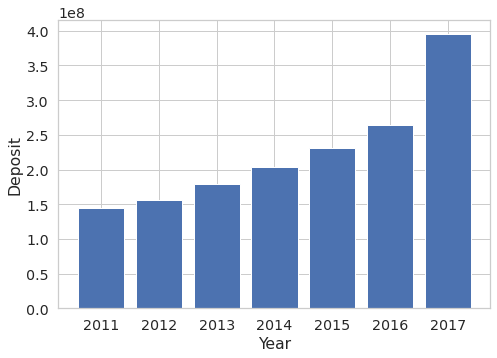

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
year = ['2011', '2012', '2013', '2014', '2015', '2016', '2017']
deposits = [df_train['deposit_amount_2011'].sum(), df_train['deposit_amount_2012'].sum(), df_train['deposit_amount_2013'].sum(), df_train['deposit_amount_2014'].sum(), df_train['deposit_amount_2015'].sum(),df_train['deposit_amount_2016'].sum(), df_train['deposit_amount_2017'].sum()]
ax.bar(year,deposits)
ax.set_xlabel('Year')
ax.set_ylabel('Deposit')
plt.show()

**Observations:**

Deposit amount increased over years.

### 5.1.2 Deposit trend over years based on age of bank

In [ ]:
df_train["age_bin"] = pd.cut(df_train['age_of_bank'], [0, 50, 100,150,200], labels=['<50','50-99','100-149','150-200'], include_lowest=True)
df_train["age_bin"]

id
1       100-149
2       50-99  
4       50-99  
5       50-99  
6       50-99  
        ...    
3765    <50    
3766    <50    
3767    50-99  
3768    50-99  
3772    50-99  
Name: age_bin, Length: 3187, dtype: category
Categories (4, object): [<50 < 50-99 < 100-149 < 150-200]

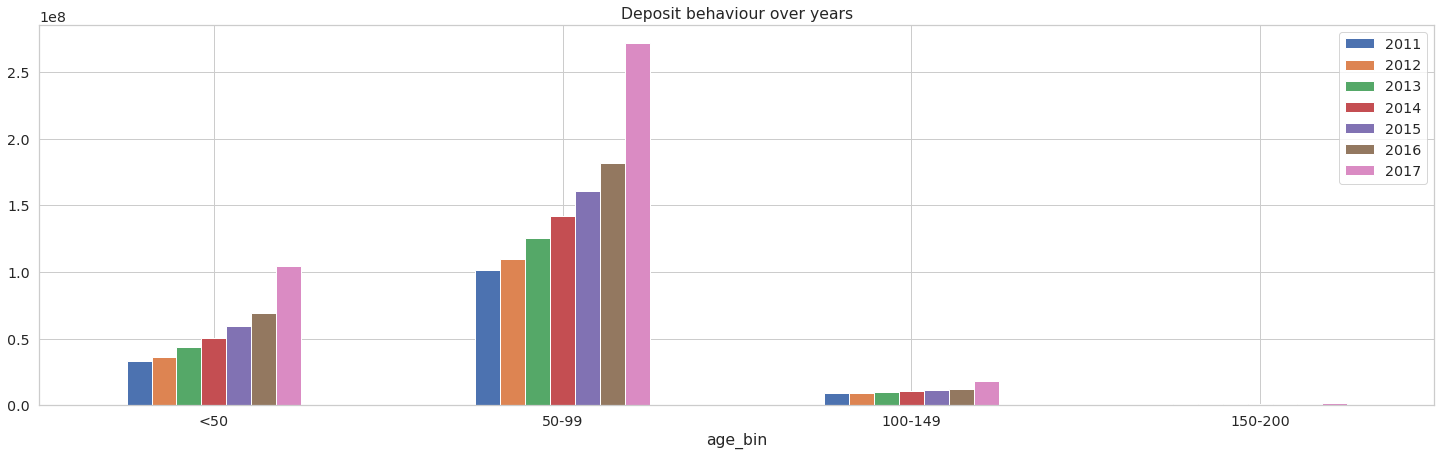

In [ ]:
df = pd.DataFrame(
	{
	'2011': df_train.groupby('age_bin')['deposit_amount_2011'].sum(),
  '2012': df_train.groupby('age_bin')['deposit_amount_2012'].sum(),
  '2013': df_train.groupby('age_bin')['deposit_amount_2013'].sum(),
  '2014': df_train.groupby('age_bin')['deposit_amount_2014'].sum(),
  '2015': df_train.groupby('age_bin')['deposit_amount_2015'].sum(),
  '2016': df_train.groupby('age_bin')['deposit_amount_2016'].sum(),
  '2017': df_train.groupby('age_bin')['deposit_amount_2017'].sum()
	}
	) 
df.plot.bar(rot=0,figsize=(25, 7), title='Deposit behaviour over years')

**Observations:**

1. Deposit amount increased over years across age of bank.

2. Banks within range of 50 to 99 has most amount of deposits.

In [ ]:
df_train.drop('age_bin', axis=1, inplace = True)

### 5.1.3  Deposit trend over years based on state


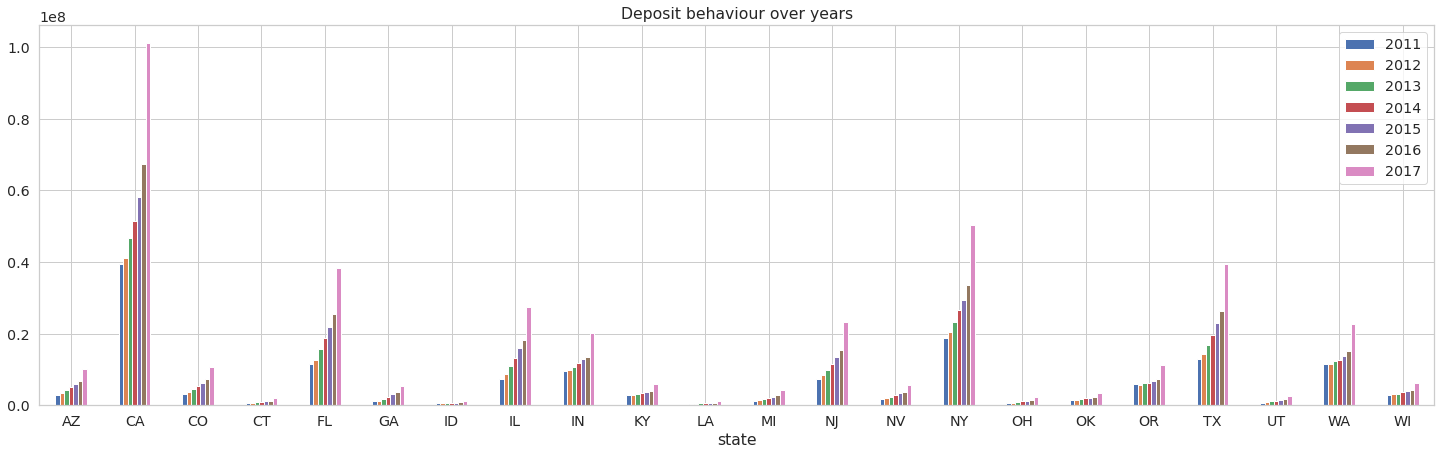

In [ ]:
df = pd.DataFrame(
	{
	'2011': df_train.groupby('state')['deposit_amount_2011'].sum(),
  '2012': df_train.groupby('state')['deposit_amount_2012'].sum(),
  '2013': df_train.groupby('state')['deposit_amount_2013'].sum(),
  '2014': df_train.groupby('state')['deposit_amount_2014'].sum(),
  '2015': df_train.groupby('state')['deposit_amount_2015'].sum(),
  '2016': df_train.groupby('state')['deposit_amount_2016'].sum(),
  '2017': df_train.groupby('state')['deposit_amount_2017'].sum()
	}
	) 
df.plot.bar(rot=0,figsize=(25, 7), title='Deposit behaviour over years')

**Observations:**

1. Deposit amount increased over years across states.

2. To name a few, CA, NY, FL and TX and most amount of deposits.

 <a id=section6></a>
 # 6. Data preparation for model building

 <a id=section601></a>
## 6.1 Converting categorical variables to numerical



In [ ]:
feature_cols = list(df_test.columns)
continuous_columns = list(df_test.select_dtypes(include='number').columns)
categorical_columns = list(df_test.columns.difference(continuous_columns))

###  Clustering location details 

Steps followed to convert location categorical information to location numerical info: 

1. Label encoding of **location , state, loc.details**
2. Apply K-Means Clustering technique to find K clusters which best represent data.
3. One-Hot Encoding of clusters to make them numerical.

### 6.1.1 Label Encoding

#### Train

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb_maker = LabelEncoder()

encoded_state = lb_maker.fit_transform(df_train['state'])
encoded_location = lb_maker.fit_transform(df_train['location'])
encoded_loc_details = lb_maker.fit_transform(df_train['loc.details'])

encoded_state = pd.DataFrame({'state': encoded_state})
encoded_location = pd.DataFrame({'location' :encoded_location})
encoded_loc_details = pd.DataFrame({'loc.details':encoded_loc_details})

df_train_encoded = pd.concat([encoded_state, encoded_location, encoded_loc_details], axis = 1)
df_train_encoded.head()

,state,location,loc.details
0,21,1279,271
1,21,422,269
2,21,932,271
3,21,1297,271
4,21,1297,271


#### Test


In [ ]:
encoded_state = lb_maker.fit_transform(df_test['state'])
encoded_location = lb_maker.fit_transform(df_test['location'])
encoded_loc_details = lb_maker.fit_transform(df_test['loc.details'])

encoded_state = pd.DataFrame({'state': encoded_state})
encoded_location = pd.DataFrame({'location' :encoded_location})
encoded_loc_details = pd.DataFrame({'loc.details':encoded_loc_details})

df_test_encoded = pd.concat([encoded_state, encoded_location, encoded_loc_details], axis = 1)
df_test_encoded.head()

,state,location,loc.details
0,9,125,34
1,8,542,173
2,8,238,106
3,8,254,173
4,8,321,106


### 6.1.2  K Means Clustering

#### Train

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_train_scaled = pd.DataFrame(scaler.fit_transform(df_train_encoded), columns=df_train_encoded.columns)

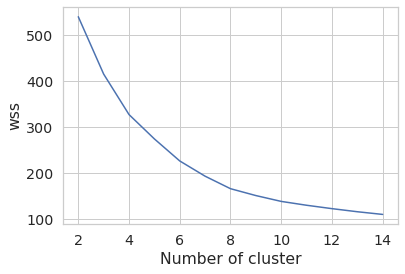

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wss = {}
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_train_scaled)
    wss[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(wss.keys()), list(wss.values()))
plt.xlabel("Number of cluster")
plt.ylabel("wss")
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans_object = KMeans(n_clusters=8, random_state=1240)
kmeans_object.fit(df_train_scaled)
df_train['zone'] = kmeans_object.predict(df_train_scaled)

In [ ]:
df_train.drop(['state', 'location', 'loc.details'], axis=1, inplace=True)

In [ ]:
df_train.head()

,deposit_amount_2011,deposit_amount_2012,deposit_amount_2013,deposit_amount_2014,deposit_amount_2015,deposit_amount_2016,deposit_amount_2017,age_of_bank,zone
id,,,,,,,,,
1,32079.0,35971.5,37237.5,40362.0,46021.5,46020.0,69030.00,106,0
2,83181.0,84846.0,97098.0,110284.5,122035.5,133905.0,200857.50,97,6
4,68511.0,73932.0,79876.5,105603.0,112113.0,110755.5,166133.25,97,0
5,96271.5,108325.5,104880.0,121054.5,113956.5,109837.5,164756.25,97,0
6,93837.0,101592.0,118270.5,140280.0,150987.0,168742.5,253113.75,97,0


#### Test

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_test_scaled = pd.DataFrame(scaler.fit_transform(df_test_encoded), columns=df_test_encoded.columns)

In [ ]:
df_test['zone'] = kmeans_object.predict(df_test_scaled)

In [ ]:
df_test.drop(['state', 'location', 'loc.details'], axis=1, inplace=True)

In [ ]:
df_test.head()

,deposit_amount_2011,deposit_amount_2012,deposit_amount_2013,deposit_amount_2014,deposit_amount_2015,deposit_amount_2016,age_of_bank,zone
id,,,,,,,,
1,949696500.0,1.114902e+09,1.248682e+09,1.374814e+09,1.548824e+09,1.604138e+09,193,4
2,439843.5,4.661865e+05,4.886130e+05,4.918950e+05,4.916880e+05,5.122125e+05,216,0
3,286516.5,3.103995e+05,3.246585e+05,3.569745e+05,3.512745e+05,3.936825e+05,53,6
4,130665.0,1.325505e+05,1.397445e+05,1.644885e+05,1.679775e+05,1.751580e+05,216,6
5,258912.0,2.591235e+05,2.841195e+05,2.976675e+05,3.077970e+05,3.348000e+05,216,6


### 6.1.3 One-Hot Encoding

#### Train

In [ ]:
df_train = pd.get_dummies(df_train, columns=['zone'], prefix=['zone'], drop_first=True)
df_train.head()

,deposit_amount_2011,deposit_amount_2012,deposit_amount_2013,deposit_amount_2014,deposit_amount_2015,deposit_amount_2016,deposit_amount_2017,age_of_bank,zone_1,zone_2,zone_3,zone_4,zone_5,zone_6,zone_7
id,,,,,,,,,,,,,,,
1,32079.0,35971.5,37237.5,40362.0,46021.5,46020.0,69030.00,106,0,0,0,0,0,0,0
2,83181.0,84846.0,97098.0,110284.5,122035.5,133905.0,200857.50,97,0,0,0,0,0,1,0
4,68511.0,73932.0,79876.5,105603.0,112113.0,110755.5,166133.25,97,0,0,0,0,0,0,0
5,96271.5,108325.5,104880.0,121054.5,113956.5,109837.5,164756.25,97,0,0,0,0,0,0,0
6,93837.0,101592.0,118270.5,140280.0,150987.0,168742.5,253113.75,97,0,0,0,0,0,0,0


#### Test

In [ ]:
df_test = pd.get_dummies(df_test, columns=['zone'], prefix=['zone'], drop_first=True)
df_test.head()

,deposit_amount_2011,deposit_amount_2012,deposit_amount_2013,deposit_amount_2014,deposit_amount_2015,deposit_amount_2016,age_of_bank,zone_1,zone_2,zone_3,zone_4,zone_5,zone_6,zone_7
id,,,,,,,,,,,,,,
1,949696500.0,1.114902e+09,1.248682e+09,1.374814e+09,1.548824e+09,1.604138e+09,193,0,0,0,1,0,0,0
2,439843.5,4.661865e+05,4.886130e+05,4.918950e+05,4.916880e+05,5.122125e+05,216,0,0,0,0,0,0,0
3,286516.5,3.103995e+05,3.246585e+05,3.569745e+05,3.512745e+05,3.936825e+05,53,0,0,0,0,0,1,0
4,130665.0,1.325505e+05,1.397445e+05,1.644885e+05,1.679775e+05,1.751580e+05,216,0,0,0,0,0,1,0
5,258912.0,2.591235e+05,2.841195e+05,2.976675e+05,3.077970e+05,3.348000e+05,216,0,0,0,0,0,1,0


 <a id=section602></a>
## 6.2 Standardization of continuous independant variables


In [ ]:
continuous_columns

['deposit_amount_2011',
 'deposit_amount_2012',
 'deposit_amount_2013',
 'deposit_amount_2014',
 'deposit_amount_2015',
 'deposit_amount_2016',
 'age_of_bank']

#### Train

In [ ]:
from sklearn.preprocessing import StandardScaler

# standardizing train data
scaler = StandardScaler().fit(df_train[continuous_columns])
data_train = scaler.transform(df_train[continuous_columns])

In [ ]:
# forming dataframe after standardization
df_train_sd= pd.DataFrame(data_train)
df_train_sd.index = df_train.index
df_train_sd.columns = continuous_columns
df_train_sd.shape, df_train.shape

((3187, 7), (3187, 15))

In [ ]:
cols = ['zone_1', 'zone_2', 'zone_3','zone_4', 'zone_5', 'zone_6', 'zone_7', 'deposit_amount_2017']
df_train_processed = pd.concat([df_train_sd, df_train[cols]], axis = 1).reindex(df_train.index)
df_train_processed.shape

(3187, 15)

#### Test


In [ ]:
# standardizing test data
data_test = scaler.transform(df_test[continuous_columns])

In [ ]:
# forming dataframe after standardization
df_test_sd= pd.DataFrame(data_test)
df_test_sd.index = df_test.index
df_test_sd.columns = continuous_columns
df_test_sd.head()

,deposit_amount_2011,deposit_amount_2012,deposit_amount_2013,deposit_amount_2014,deposit_amount_2015,deposit_amount_2016,age_of_bank
id,,,,,,,
1,26018.408992,29878.849863,31542.109251,33124.129428,35208.143676,33689.551757,3.120300
2,10.809486,11.184534,10.920695,10.315759,9.526859,9.021280,3.710347
3,6.608655,7.009333,6.778967,7.064898,6.334804,6.531825,-0.471291
4,2.338658,2.242854,2.107771,2.427016,2.167867,1.942211,3.710347
5,5.852351,5.635100,5.754893,5.635917,5.346419,5.295131,3.710347


In [ ]:
cols = ['zone_1', 'zone_2', 'zone_3','zone_4', 'zone_5', 'zone_6', 'zone_7']
df_test_processed = pd.concat([df_test_sd, df_test[cols]], axis = 1).reindex(df_test.index)
df_test_processed.shape

(1623, 14)

 <a id=section7></a>
 # 7. Ensemble Modelling and Prediction
 
 Ensemble modeling is a process where multiple diverse models are created to predict an outcome, either by using many different modeling algorithms or using different training data sets. The ensemble model then aggregates the prediction of each base model and results in once final prediction for the unseen data.

 <a id=section701></a>
 ## 7.1 Linear Regression
 
 
Linear regression is a basic and commonly used type of predictive analysis.  The overall idea of regression is to examine two things: 

1. Does a set of predictor variables do a good job in predicting an outcome (dependent) variable?  
2. Which variables in particular are significant predictors of the outcome variable, and in what way do they–indicated by the magnitude and sign of the beta estimates–impact the outcome variable?  

These regression estimates are used to explain the relationship between one dependent variable and one or more independent variables.  The simplest form of the regression equation with one dependent and one independent variable is defined by the formula y = c + b*x, where y = estimated dependent variable score, c = constant, b = regression coefficient, and x = score on the independent variable.


 <a id=section70101></a>
### 7.1.1  Checking assumptions of Linear Regression

In [ ]:
df_train_lr = df_train_processed.copy()
df_test_lr = df_test_processed.copy()

#### a. Target variable should be normally distributed


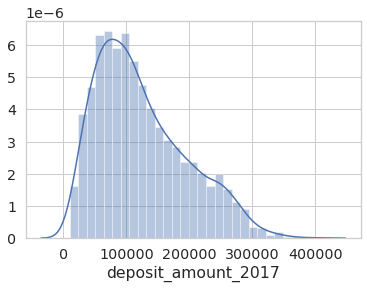

In [ ]:
target = df_train_lr['deposit_amount_2017']
sns.distplot(target, color="b")

**Observations**

1. We observe target variable i.e; Target Variable is not normally distributed
2. Lets apply log transformation and check.

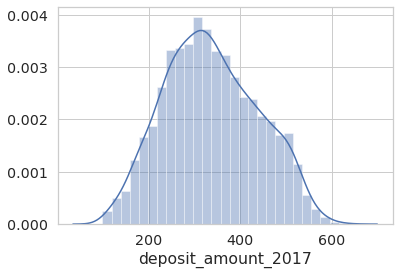

In [ ]:
target= np.sqrt(target)
sns.distplot(target, color="b")

**Observations:** Log transformation worked. Lets check another assumption.

In [ ]:
df_train_lr['deposit_amount_2017'] = target

In [ ]:
df_train_lr['deposit_amount_2017']

id
1       262.735609
2       448.171284
4       407.594468
5       405.901774
6       503.104114
           ...    
3765    134.540886
3766    136.672967
3767    120.691756
3768    110.288259
3772    153.455205
Name: deposit_amount_2017, Length: 3187, dtype: float64

#### b. Independant variables shouldn't be correlated

In [ ]:
# extracting feature columns
feature_cols = list(df_test_lr.columns)

In [ ]:
# extracting highly correlated columns to drop

# Create correlation matrix
corr_matrix = df_train_lr[feature_cols].corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]
to_drop

['deposit_amount_2012',
 'deposit_amount_2013',
 'deposit_amount_2014',
 'deposit_amount_2015',
 'deposit_amount_2016']

In [ ]:
# Drop features 
df_train_lr.drop(to_drop, axis=1, inplace=True)
df_test_lr.drop(to_drop, axis=1, inplace=True)
df_train_lr.shape,  df_test_lr.shape

((3187, 10), (1623, 9))

 <a id=section70102></a>
### 7.1.2  Split data in to train and test

In [ ]:
from sklearn.model_selection import train_test_split

def split(X,y):
    return train_test_split(X, y, test_size=0.30, random_state=1)

In [ ]:
feature_cols = df_test_lr.columns

X_lr = df_train_lr[feature_cols]
y_lr = df_train_lr['deposit_amount_2017']

In [ ]:
X_train_lr, X_test_lr, y_train_lr, y_test_lr=split(X_lr,y_lr)
print('Train cases as below')
print('X_train shape: ',X_train_lr.shape)
print('y_train shape: ',y_train_lr.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test_lr.shape)
print('y_test shape: ',y_test_lr.shape)

Train cases as below
X_train shape:  (2230, 9)
y_train shape:  (2230,)

Test cases as below
X_test shape:  (957, 9)
y_test shape:  (957,)


 <a id=section70103></a>
### 7.1.3  Applying model and prediction

In [ ]:
X_train_lr.head()

,deposit_amount_2011,age_of_bank,zone_1,zone_2,zone_3,zone_4,zone_5,zone_6,zone_7
id,,,,,,,,,
1567,-0.254550,0.657495,0,0,0,0,1,0,0
1449,0.266763,0.272682,0,0,0,0,0,0,1
2600,-0.767273,0.657495,0,0,0,0,0,1,0
3338,-1.182482,-1.728347,0,0,0,1,0,0,0
754,1.457049,-0.266057,0,0,0,0,0,0,0


In [ ]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train_lr,y_train_lr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
 # make predictions on the training set
y_pred_train_lr = linreg.predict(X_train_lr) 

In [ ]:
 # make predictions on the testing set
y_pred_test_lr = linreg.predict(X_test_lr)  

 <a id=section70104></a>
### 7.1.4 Model Evaluation

####  RMSE


In [ ]:
from sklearn import metrics
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train_lr, y_pred_train_lr))
print('RMSE for training set is {}'.format(RMSE_train))

RMSE_test = np.sqrt( metrics.mean_squared_error(y_test_lr, y_pred_test_lr))
print('RMSE for testing set is {}'.format(RMSE_test))

RMSE for training set is 60.669974336553715
RMSE for testing set is 57.38786807298387


 <a id=section702></a>
## 7.2 Random Forest

##### Splitting train and test data


In [ ]:
feature_cols = df_test_processed.columns
feature_cols

Index(['deposit_amount_2011', 'deposit_amount_2012', 'deposit_amount_2013',
       'deposit_amount_2014', 'deposit_amount_2015', 'deposit_amount_2016',
       'age_of_bank', 'zone_1', 'zone_2', 'zone_3', 'zone_4', 'zone_5',
       'zone_6', 'zone_7'],
      dtype='object')

In [ ]:
X = df_train_processed[feature_cols]
y = df_train_processed['deposit_amount_2017']

In [ ]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf=split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train_rf.shape)
print('y_train shape: ',y_train_rf.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test_rf.shape)
print('y_test shape: ',y_test_rf.shape)

Train cases as below
X_train shape:  (2230, 14)
y_train shape:  (2230,)

Test cases as below
X_test shape:  (957, 14)
y_test shape:  (957,)


 <a id=section70201></a>

### 7.2.1 Using Default Model




#### a. Building Model and Prediction

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# using default model for building
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train_rf, y_train_rf)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred_train_rf = rf_reg.predict(X_train_rf)
y_pred_test_rf = rf_reg.predict(X_test_rf)

### b. Model Evaluation

##### RMSE


In [ ]:
from sklearn import metrics
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train_rf, y_pred_train_rf))
print('RMSE for training set is {}'.format(RMSE_train))

RMSE_test = np.sqrt( metrics.mean_squared_error(y_test_rf, y_pred_test_rf))
print('RMSE for testing set is {}'.format(RMSE_test))

RMSE for training set is 438.1960261952773
RMSE for testing set is 429.1403255568778



### 7.2.2 Using RandomizedSearchCV

#### a. Building Model and Prediction

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'n_estimators' : n_estimators,
               'bootstrap': bootstrap
               
              }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Instantiate the grid search model
rf_reg_rs = RandomizedSearchCV(estimator = rf_reg, param_distributions = random_grid, n_iter = 100, cv = 3, 
                               verbose=2, random_state=42, n_jobs = -1)

In [ ]:
rf_reg_rs.fit(X_train_rf, y_train_rf)

In [ ]:
#prediction on training data
y_pred_train_rf_rs = rf_reg_rs.predict(X_train_rf)

#prediction on testing data
y_pred_test_rf_rs = rf_reg_rs.predict(X_test_rf)



### b. Model Evaluation

#####  RMSE


In [ ]:
from sklearn import metrics
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train_rf, y_pred_train_rf_rs))
print('RMSE for training set is {}'.format(RMSE_train))

RMSE_test = np.sqrt( metrics.mean_squared_error(y_test_rf, y_pred_test_rf_rs))
print('RMSE for testing set is {}'.format(RMSE_test))

RMSE for training set is 0.0
RMSE for testing set is 469.81777247101667


 <a id=section703></a>
## 7.3 GradientBoostingRegressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

regressorGB = GradientBoostingRegressor(
    n_estimators = 50,
    max_depth = 6,
    min_samples_split = 2,
    learning_rate = 0.1,
    loss = 'ls'
)
regressorGB.fit(X_train_rf, y_train_rf)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=6,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
#prediction on training data
y_pred_train_rf_rs = regressorGB.predict(X_train_rf)

#prediction on testing data
y_pred_test_rf_rs = regressorGB.predict(X_test_rf)



### b. Model Evaluation

#####  RMSE


In [ ]:
from sklearn import metrics
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train_rf, y_pred_train_rf_rs))
print('RMSE for training set is {}'.format(RMSE_train))

RMSE_test = np.sqrt( metrics.mean_squared_error(y_test_rf, y_pred_test_rf_rs))
print('RMSE for testing set is {}'.format(RMSE_test))

RMSE for training set is 370.74758027201017
RMSE for testing set is 440.3063719431171


# 8. Conclusion

NOTE:

Linear Regression and Random Forest after hyper parameter tuning gave goog RMSE score. Lets use Linear Regerssion for final prediction.

In [ ]:
final_preds_rf = linreg.predict(df_test_lr)

In [ ]:
final_preds_df = pd.DataFrame(data = list(final_preds_rf), columns = ['deposit_amount_2017'])
final_preds_df.index = df_test_processed.index
final_preds_df['deposit_amount_2017'] = final_preds_df['deposit_amount_2017'].apply(lambda x: round(x*x))
final_preds_df.to_csv('final_preds_lr.csv')